In [1]:
# # Section 1 — Environment, imports, and sequence dataset (PyTorch)
# import os
# import random
# import numpy as np
# import pandas as pd

# # PyTorch imports
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader

# # sklearn for scaling and RF (if you still use RandomForest)
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# # Reproducibility & device
# SEED = 42
# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed_all(SEED)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# # ---- helpers: create sliding-window sequences ----
# def create_sequences(values: np.ndarray, seq_length: int = 10):
#     """
#     values: 1D or 2D numpy array with shape (N, features) or (N,)
#     returns: X (num_samples, seq_length, features), y (num_samples, features)
#     """
#     values = np.asarray(values)
#     if values.ndim == 1:
#         values = values.reshape(-1, 1)
#     xs, ys = [], []
#     for i in range(len(values) - seq_length):
#         x = values[i:(i + seq_length)]
#         y = values[i + seq_length]
#         xs.append(x)
#         ys.append(y)
#     return np.array(xs), np.array(ys)

# # ---- PyTorch Dataset wrapper for sequences ----
# class SequenceDataset(Dataset):
#     def __init__(self, X: np.ndarray, y: np.ndarray):
#         """
#         X: numpy array (N, seq_len, n_features)
#         y: numpy array (N, n_features) or (N,)
#         """
#         assert len(X) == len(y)
#         self.X = X.astype(np.float32)
#         self.y = y.astype(np.float32)

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         # return as tensors
#         return torch.from_numpy(self.X[idx]), torch.from_numpy(self.y[idx])

# # ---- Example preprocessing pipeline (adapt to your DataFrame) ----
# # Assumes your DataFrame 'agg' has a column 'cpu_utilization' (or change accordingly).
# # If you have multiple features, pass those columns instead of single column.

# # Example:
# # agg = pd.read_csv("your_agg.csv", parse_dates=['timestamp'])  # if needed
# # agg = agg.sort_values('timestamp').reset_index(drop=True)

# SEQ_LEN = 10
# BATCH_SIZE = 64

# # --- scaler & sequence creation ---
# scaler = MinMaxScaler()
# # Replace 'cpu_utilization' with the appropriate column(s) from your notebook
# vals = agg[['cpu_utilization']].values  # shape (N,1)
# vals_scaled = scaler.fit_transform(vals)

# X_seq, y_seq = create_sequences(vals_scaled, seq_length=SEQ_LEN)  # X: (N-SEQ_LEN, SEQ_LEN, 1)

# # Optional: if you want to predict a scalar per sample (1-step ahead), keep y as (N,1)
# # Train/test split (time-series aware: no shuffle; split by index)
# split_idx = int(0.8 * len(X_seq))
# X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
# y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# train_ds = SequenceDataset(X_train, y_train)
# test_ds  = SequenceDataset(X_test, y_test)

# train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
# test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

# print("Train samples:", len(train_ds), "Test samples:", len(test_ds))
# print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



C:\Users\trivi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.sparse import csr_matrix, issparse


Using device: cuda


NameError: name 'agg' is not defined

In [10]:
# # ==============================================================
# # SECTION 1 — IMPORTS & CONFIG
# # ==============================================================

# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset

# # Config
# DATA_PATH = r"D:/cloud proj/data/fastStorage/2013-8"  # Path to BitBrain dataset folder
# NUM_VMS = 100         # Number of VMs to average (start small, can go to 1250)
# SEQ_LEN = 20
# BATCH_SIZE = 64
# LSTM_EPOCHS = 5
# LR = 0.001
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# # Autoscaling params
# TARGET_UTIL = 0.65         # desired CPU utilization per instance
# INSTANCE_CAPACITY = 100.0  # 100% CPU capacity
# COST_PER_INSTANCE = 0.01   # cost per minute per instance
# COOLDOWN = 5               # minutes between scaling actions
# STARTUP_DELAY = 2          # minutes until new instance becomes active
# THRESHOLD = 70             # baseline threshold for static policy
# ==============================================================
# SECTION 1 — IMPORTS & CONFIG
# ==============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# ---------------------
# CONFIG
# ---------------------
DATA_PATH = r"D:/cloud proj/data/fastStorage/2013-8"   # Your Bitbrains dataset path
NUM_VMS = 50                                 # adjust up to 1250 later
SEQ_LEN = 20
BATCH_SIZE = 64
LSTM_EPOCHS = 5
LR = 0.001
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {DEVICE}")


Using device: cuda


Loaded 50 VMs with 468341 total records.


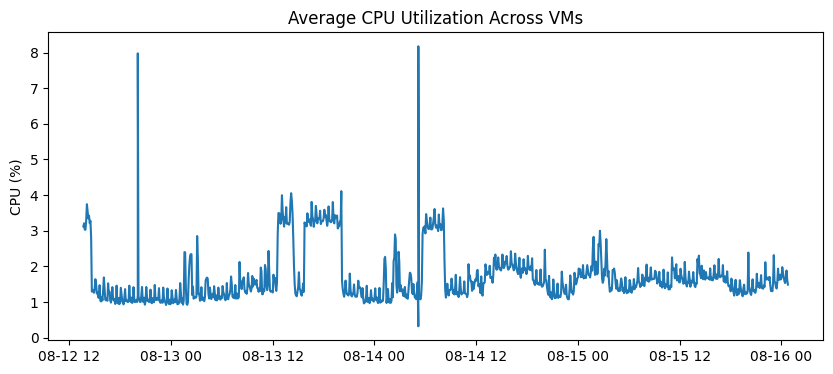

,timestamp,cpu_utilization
0,2013-08-12 13:40:46,3.121528
1,2013-08-12 13:45:46,3.208507
2,2013-08-12 13:50:46,3.028299
3,2013-08-12 13:55:46,3.031771
4,2013-08-12 14:00:46,3.301736


In [11]:
# ==============================================================
# SECTION 2 — LOAD DATA
# ==============================================================

# ==============================================================
# SECTION 2 — LOAD & PREPROCESS BITBRAINS DATA
# ==============================================================

def load_bitbrains_data(path, num_files=5):
    files = [f for f in os.listdir(path) if f.endswith('.csv')]
    dataframes = []

    for i, file in enumerate(files[:num_files]):
        df = pd.read_csv(os.path.join(path, file), sep=';')
        df = df.rename(columns=lambda x: x.strip().lower())
        if 'timestamp [ms]' in df.columns:
            df = df.rename(columns={'timestamp [ms]': 'timestamp'})
        df['vm_id'] = file.replace('.csv', '')
        dataframes.append(df)

    combined = pd.concat(dataframes)
    combined = combined.reset_index(drop=True)
    print(f"Loaded {len(dataframes)} VMs with {len(combined)} total records.")
    return combined

# Load dataset
data = load_bitbrains_data(DATA_PATH, NUM_VMS)

# Timestamp formatting
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s', errors='coerce')
data = data.dropna(subset=['timestamp'])
data = data.sort_values('timestamp')

# Identify CPU column (Bitbrain uses "cpu usage [%]")
if 'cpu usage [%]' in data.columns:
    metric_col = 'cpu usage [%]'
elif 'cpu_utilization' in data.columns:
    metric_col = 'cpu_utilization'
else:
    metric_col = data.columns[1]

# Aggregate CPU usage across all VMs
agg = data.groupby('timestamp')[metric_col].mean().reset_index()
agg = agg.rename(columns={metric_col: 'cpu_utilization'})

# Plot preview
plt.figure(figsize=(10,4))
plt.plot(agg['timestamp'][:1000], agg['cpu_utilization'][:1000])
plt.title("Average CPU Utilization Across VMs")
plt.ylabel("CPU (%)")
plt.show()

agg.head()


Random Forest → MAE: 0.129, RMSE: 0.367


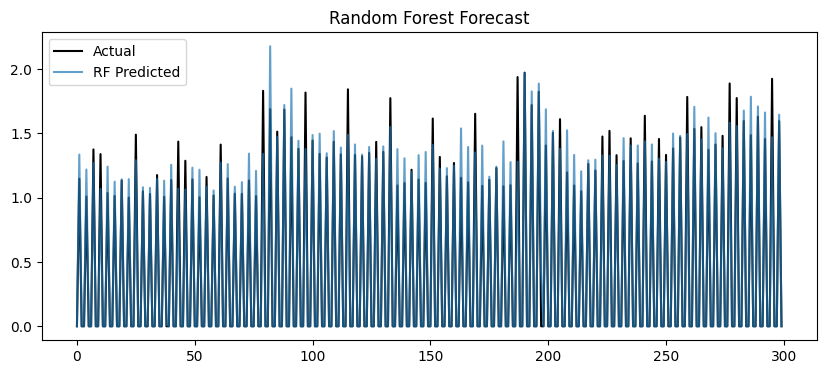

In [12]:
# ==============================================================
# SECTION 3 — RANDOM FOREST FORECAST
# ==============================================================

def create_rf_features(df, lags=10):
    data = df.copy()
    for i in range(1, lags + 1):
        data[f"lag_{i}"] = data["cpu_utilization"].shift(i)
    data = data.dropna().reset_index(drop=True)
    X = data[[f"lag_{i}" for i in range(1, lags + 1)]]
    y = data["cpu_utilization"]
    return X, y

X_rf, y_rf = create_rf_features(agg, lags=10)
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Random Forest → MAE: {rf_mae:.3f}, RMSE: {rf_rmse:.3f}")

plt.figure(figsize=(10,4))
plt.plot(y_test.values[:300], label="Actual", color="black")
plt.plot(rf_preds[:300], label="RF Predicted", alpha=0.7)
plt.title("Random Forest Forecast")
plt.legend()
plt.show()


Epoch 1/5 — Loss: 0.0060
Epoch 2/5 — Loss: 0.0046
Epoch 3/5 — Loss: 0.0023
Epoch 4/5 — Loss: 0.0016
Epoch 5/5 — Loss: 0.0012
LSTM → MAE: 0.210, RMSE: 0.374


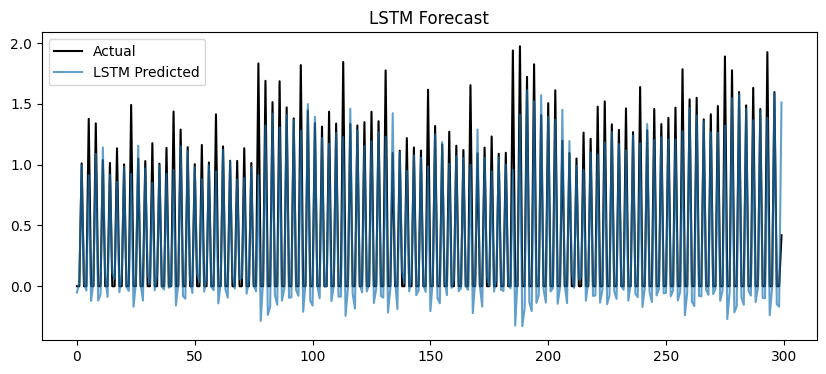

In [13]:
# ==============================================================
# SECTION 4 — PYTORCH LSTM FORECAST
# ==============================================================

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

def create_sequences(values, seq_len=20):
    X, y = [], []
    for i in range(len(values) - seq_len):
        X.append(values[i:i+seq_len])
        y.append(values[i+seq_len])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(agg[["cpu_utilization"]])
X_seq, y_seq = create_sequences(scaled, SEQ_LEN)

X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=BATCH_SIZE, shuffle=False)

def train_lstm(model, train_loader, epochs, lr):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} — Loss: {total_loss/len(train_loader):.4f}")

model = LSTMModel().to(DEVICE)
train_lstm(model, train_loader, LSTM_EPOCHS, LR)

model.eval()
with torch.no_grad():
    preds = model(X_val_t.to(DEVICE)).cpu().numpy().flatten()
    preds_inv = scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

lstm_mae = mean_absolute_error(y_val_inv, preds_inv)
lstm_rmse = np.sqrt(mean_squared_error(y_val_inv, preds_inv))
print(f"LSTM → MAE: {lstm_mae:.3f}, RMSE: {lstm_rmse:.3f}")

plt.figure(figsize=(10,4))
plt.plot(y_val_inv[:300], label="Actual", color="black")
plt.plot(preds_inv[:300], label="LSTM Predicted", alpha=0.7)
plt.title("LSTM Forecast")
plt.legend()
plt.show()


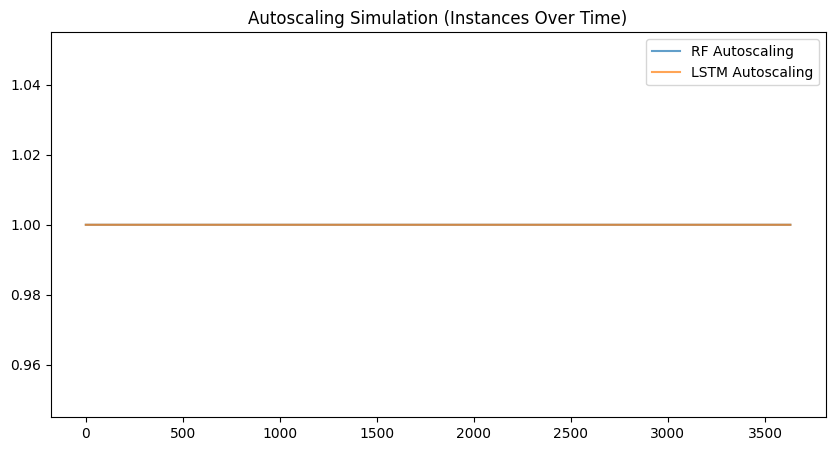

RF Policy → cost=36.32, SLO violations=0
LSTM Policy → cost=36.32, SLO violations=0


In [14]:
# ==============================================================
# SECTION 5 — AUTOSCALING SIMULATOR
# ==============================================================

def simulate_autoscaling(cpu_trace, predictions, threshold=70, cooldown=5):
    instances = 1
    cooldown_timer = 0
    cost = 0
    violations = 0
    instance_history = []

    for t in range(len(cpu_trace)):
        actual = cpu_trace[t]
        pred = predictions[t] if t < len(predictions) else predictions[-1]

        per_instance_load = actual / instances
        cost += instances * 0.01  # cost per time unit
        violations += int(per_instance_load > threshold)

        if cooldown_timer > 0:
            cooldown_timer -= 1
        else:
            if pred > threshold:
                instances += 1
                cooldown_timer = cooldown
            elif pred < 40 and instances > 1:
                instances -= 1
                cooldown_timer = cooldown

        instance_history.append(instances)

    return instance_history, cost, violations

cpu_trace = agg["cpu_utilization"].values[-len(preds_inv):]
inst_rf, cost_rf, vio_rf = simulate_autoscaling(cpu_trace, rf_preds)
inst_lstm, cost_lstm, vio_lstm = simulate_autoscaling(cpu_trace, preds_inv)

plt.figure(figsize=(10,5))
plt.plot(inst_rf, label="RF Autoscaling", alpha=0.7)
plt.plot(inst_lstm, label="LSTM Autoscaling", alpha=0.7)
plt.title("Autoscaling Simulation (Instances Over Time)")
plt.legend()
plt.show()

print(f"RF Policy → cost={cost_rf:.2f}, SLO violations={vio_rf}")
print(f"LSTM Policy → cost={cost_lstm:.2f}, SLO violations={vio_lstm}")


In [16]:
# ==============================================================
# SECTION 1 — IMPORTS & CONFIG
# ==============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings("ignore")

# ---------------------
# CONFIG
# ---------------------
DATA_PATH = r"D:/cloud proj/data/fastStorage/2013-8"   # update to your folder
NUM_VMS = 100                                 # how many VM files to aggregate (start small)
SEQ_LEN = 30                                  # lookback for LSTM
BATCH_SIZE = 128
LSTM_EPOCHS = 6
LR = 0.001
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# Autoscaling / cost model params
TARGET_UTIL = 0.65            # desired CPU utilization per instance (fraction)
CAPACITY_PER_INSTANCE = 100.0 # model units (we treat CPU% scale where 100 == one instance capacity)
COST_PER_MINUTE = 0.015       # $ per minute per instance
STARTUP_DELAY = 2             # minutes for a new instance to become active
COOLDOWN = 5                  # minutes between scaling actions
UNDERUTIL_PENALTY_RATE = 0.5  # fraction of instance cost charged as penalty per unit idle (0..1)
THRESHOLD_UP = 0.80           # scale up if predicted per-instance util > this fraction
THRESHOLD_DOWN = 0.35         # scale down if predicted per-instance util < this fraction

print(f"DEVICE: {DEVICE}")


DEVICE: cuda


In [20]:
def load_bitbrains_data(path, num_files=50):
    files = [f for f in os.listdir(path) if f.endswith('.csv')]
    if len(files) == 0:
        raise FileNotFoundError("No .csv files found in DATA_PATH.")
    dfs = []
    for f in files[:num_files]:
        df = pd.read_csv(os.path.join(path, f), sep=';')
        df.columns = [c.strip().lower() for c in df.columns]
        if 'timestamp [ms]' in df.columns:
            df = df.rename(columns={'timestamp [ms]':'timestamp'})
        df = df.rename(columns=lambda x: x.strip())
        standard_cols = {}
        for col in df.columns:
            low = col.lower()
            if 'cpu usage' in low:
                standard_cols[col] = 'cpu_pct'
            if 'memory usage' in low:
                standard_cols[col] = 'mem_kb'
            if 'network received' in low:
                standard_cols[col] = 'net_in_kb_s'
            if 'network transmitted' in low:
                standard_cols[col] = 'net_out_kb_s'
            if 'timestamp' in low:
                standard_cols[col] = 'timestamp'
        df = df.rename(columns=standard_cols)

        keep = [c for c in ['timestamp','cpu_pct','mem_kb','net_in_kb_s','net_out_kb_s'] if c in df.columns]
        df = df[keep].copy()
        if 'timestamp' not in df.columns:
            raise KeyError(f"No timestamp column in file {f}")

        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
        if df['timestamp'].max() > 1e12:
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', errors='coerce')
        else:
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
        df = df.dropna(subset=['timestamp'])

        # ✨ Deduplicate timestamps — keep the first occurrence
        df = df[~df['timestamp'].duplicated(keep='first')]

        df = df.set_index('timestamp').sort_index()
        dfs.append(df)

    # now concatenation will succeed
    combined = pd.concat(dfs, axis=1, keys=[f"vm{i}" for i in range(len(dfs))])
    combined.columns = [f"{vm}_{col}" for vm, col in combined.columns]

    metrics = {}
    for metric in ['cpu_pct','mem_kb','net_in_kb_s','net_out_kb_s']:
        cols = [c for c in combined.columns if c.endswith(f"_{metric}")]
        if len(cols) == 0:
            continue
        metrics[metric] = combined[cols].mean(axis=1)
    df_agg = pd.DataFrame(metrics).dropna().reset_index().sort_values('timestamp').reset_index(drop=True)

    print(f"Aggregated {len(dfs)} VMs -> {len(df_agg)} timestamp rows (duplicates removed)")
    return df_agg
agg = load_bitbrains_data(DATA_PATH, NUM_VMS)


Aggregated 100 VMs -> 18179 timestamp rows (duplicates removed)


RF MAE: 1.786679412259236
RF RMSE: 5.211939530210019


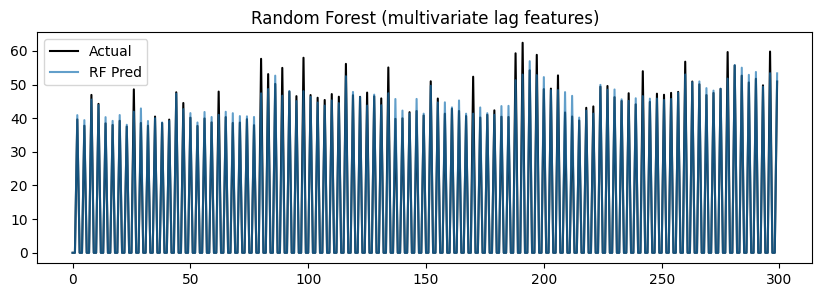

In [21]:
# ==============================================================
# SECTION 3 — MULTIVARIATE FEATURES FOR RANDOM FOREST
# ==============================================================

def create_multivariate_lag_features(df, target_col='cpu_pct', lags=10):
    data = df.copy()
    # create lag features for each metric
    metrics = [c for c in df.columns if c != 'timestamp']
    for m in metrics:
        for i in range(1, lags+1):
            data[f"{m}_lag{i}"] = data[m].shift(i)
    data = data.dropna().reset_index(drop=True)
    X = data[[c for c in data.columns if c not in ('timestamp', target_col)]]
    y = data[target_col]
    return X, y

# prepare RF features
X_rf, y_rf = create_multivariate_lag_features(agg, target_col='cpu_pct', lags=8)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=RANDOM_STATE)
rf.fit(X_train_rf, y_train_rf)
rf_preds_test = rf.predict(X_test_rf)

print("RF MAE:", mean_absolute_error(y_test_rf, rf_preds_test))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test_rf, rf_preds_test)))

plt.figure(figsize=(10,3))
plt.plot(y_test_rf.values[:300], label='Actual', color='black')
plt.plot(rf_preds_test[:300], label='RF Pred', alpha=0.7)
plt.legend()
plt.title("Random Forest (multivariate lag features)")
plt.show()


Using features: ['cpu_pct', 'mem_kb', 'net_in_kb_s', 'net_out_kb_s']
Epoch 1/6 — train_loss=0.001637, val_loss=0.001299
Epoch 2/6 — train_loss=0.001296, val_loss=0.000911
Epoch 3/6 — train_loss=0.000985, val_loss=0.000543
Epoch 4/6 — train_loss=0.000776, val_loss=0.000161
Epoch 5/6 — train_loss=0.000651, val_loss=0.000161
Epoch 6/6 — train_loss=0.000613, val_loss=0.000227
LSTM MAE: 8.609349754827832
LSTM RMSE: 11.015848976642843


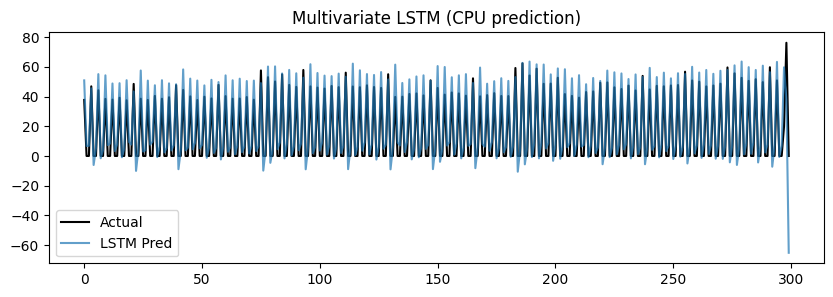

In [22]:
# ==============================================================
# SECTION 4 — MULTIVARIATE LSTM (PYTORCH)
# ==============================================================

class MultiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # predict next CPU %
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

def create_multivariate_sequences(df, feature_cols, seq_len=30):
    arr = df[feature_cols].values
    X, y = [], []
    for i in range(len(arr) - seq_len):
        X.append(arr[i:i+seq_len])
        y.append(arr[i+seq_len][feature_cols.index('cpu_pct')])  # cpu_pct as target
    return np.array(X), np.array(y)

# choose features (cpu, mem, net_in, net_out if present)
feature_cols = [c for c in agg.columns if c in ('cpu_pct','mem_kb','net_in_kb_s','net_out_kb_s')]
print("Using features:", feature_cols)

# scale features separately
scalers = {}
scaled_df = agg.copy()
for col in feature_cols:
    scaler = MinMaxScaler()
    scaled_df[col] = scaler.fit_transform(scaled_df[[col]])
    scalers[col] = scaler

X_seq, y_seq = create_multivariate_sequences(scaled_df, feature_cols, seq_len=SEQ_LEN)

# train/test split
split = int(0.8 * len(X_seq))
X_train_seq, X_val_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_val_seq = y_seq[:split], y_seq[split:]

# tensors
X_train_t = torch.tensor(X_train_seq, dtype=torch.float32).to(DEVICE)
y_train_t = torch.tensor(y_train_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)
X_val_t = torch.tensor(X_val_seq, dtype=torch.float32).to(DEVICE)
y_val_t = torch.tensor(y_val_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=BATCH_SIZE, shuffle=False)

# model
model = MultiLSTM(input_size=len(feature_cols), hidden_size=128, num_layers=2).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# training loop (short)
for epoch in range(LSTM_EPOCHS):
    model.train()
    train_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    # validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            val_loss += criterion(preds, yb).item()
    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}/{LSTM_EPOCHS} — train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

# predictions on validation set
model.eval()
with torch.no_grad():
    preds_scaled = model(X_val_t).cpu().numpy().flatten()

# inverse-scale predictions and y_val
# y_val are scaled CPU values (0..1), inverse transform using cpu scaler
cpu_scaler = scalers['cpu_pct']
preds_cpu = cpu_scaler.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
y_val_actual = cpu_scaler.inverse_transform(y_val_seq.reshape(-1,1)).flatten()

print("LSTM MAE:", mean_absolute_error(y_val_actual, preds_cpu))
print("LSTM RMSE:", np.sqrt(mean_squared_error(y_val_actual, preds_cpu)))

plt.figure(figsize=(10,3))
plt.plot(y_val_actual[:300], label='Actual', color='black')
plt.plot(preds_cpu[:300], label='LSTM Pred', alpha=0.7)
plt.legend()
plt.title("Multivariate LSTM (CPU prediction)")
plt.show()


LSTM sim → cost: 84.66, SLO_violations: 120, scale_actions: 152
RF sim → cost: 80.79, SLO_violations: 127, scale_actions: 94


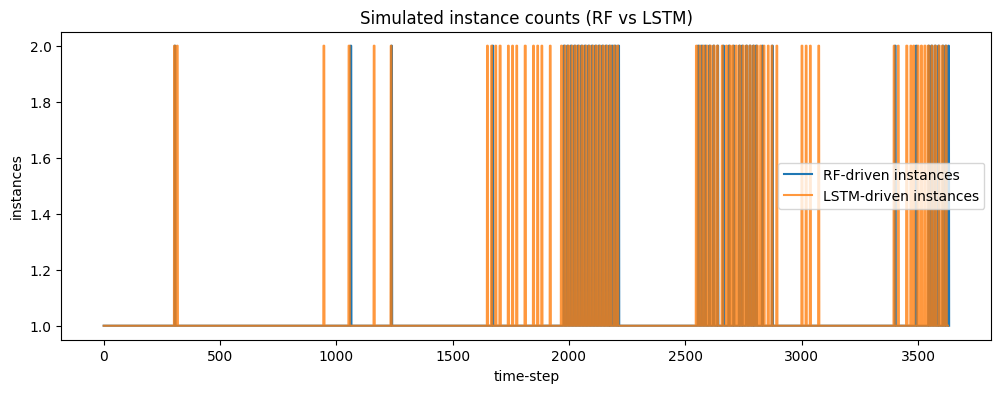

In [23]:
# ==============================================================
# SECTION 5 — AUTOSCALING SIMULATOR (CLOUD-LIKE)
# ==============================================================

def simulate_with_cost(cpu_series, pred_series, 
                       capacity_per_instance=CAPACITY_PER_INSTANCE,
                       target_util=TARGET_UTIL,
                       startup_delay=STARTUP_DELAY,
                       cooldown=COOLDOWN,
                       cost_per_min=COST_PER_MINUTE,
                       underutil_penalty_rate=UNDERUTIL_PENALTY_RATE,
                       threshold_up=THRESHOLD_UP,
                       threshold_down=THRESHOLD_DOWN):
    """
    cpu_series  : array of actual CPU % (per aggregated unit)
    pred_series : array of predicted CPU % aligned to cpu_series (same length)
    Returns: dataframe with history and metrics
    """
    n = len(cpu_series)
    instances = 1
    pending = []   # list of (remaining_time) for pending instances
    cooldown_timer = 0
    history = []

    total_cost = 0.0
    slo_violations = 0
    scale_actions = 0

    for t in range(n):
        actual = cpu_series[t]              # actual CPU % (0..100)
        pred = pred_series[t] if t < len(pred_series) else pred_series[-1]

        # activate pending instances whose timer reached 0
        pending = [p-1 for p in pending]
        ready = pending.count(0)
        if ready > 0:
            instances += ready
        # remove those that reached 0
        pending = [p for p in pending if p > 0]

        # compute per-instance utilization (divide demand across active instances)
        if instances == 0:
            instances = 1
        per_inst_util = actual / instances  # still in percent units

        # SLO violation if per-instance util > target * 100
        if per_inst_util > target_util * 100:
            slo_violations += 1

        # cost: pay for active instances + pending instances (cloud often charges for pending too in some contexts)
        running_cost = instances * cost_per_min
        pending_cost = len(pending) * cost_per_min * 0.5  # assume pending pays half (tunable)
        total_cost += running_cost + pending_cost

        # underutilization penalty: if per-instance util is much lower than target, penalize idle capacity
        idle_fraction = max(0.0, (target_util * 100 - per_inst_util) / (target_util * 100))
        underutil_penalty = running_cost * idle_fraction * underutil_penalty_rate
        total_cost += underutil_penalty

        # scaling decision only if not in cooldown
        if cooldown_timer > 0:
            cooldown_timer -= 1
        else:
            # estimate required instances from prediction
            # assume predicted 'actual' is total demand (percent units). compute desired instances
            desired_instances = max(1, int(np.ceil(pred / (target_util * 100))))
            # scale up if predicted demand requires more
            if desired_instances > instances:
                # add one instance to pending (simulate gradual scale)
                pending.append(startup_delay)
                cooldown_timer = cooldown
                scale_actions += 1
            # scale down if predicted demand much lower (and at least one instance can be removed)
            elif desired_instances < instances:
                # remove one immediately (simulate quick termination)
                instances = max(1, instances - 1)
                cooldown_timer = cooldown
                scale_actions += 1

        history.append({
            "time": t,
            "instances": instances,
            "pending": len(pending),
            "actual_cpu": actual,
            "pred_cpu": pred,
            "per_instance_util": per_inst_util,
            "running_cost": running_cost,
            "pending_cost": pending_cost,
            "underutil_penalty": underutil_penalty,
            "total_cost_so_far": total_cost,
            "slo_violation": int(per_inst_util > target_util * 100)
        })

    return pd.DataFrame(history), total_cost, slo_violations, scale_actions

# align CPU trace & predictions: use last validation part for simulation
# We'll simulate on validation region (where preds exist)
cpu_val = y_val_actual.copy()               # actual CPU values for validation
lstm_pred = preds_cpu.copy()                # LSTM predicts for validation
# For RF: we used X_test_rf and rf_preds_test; align rf predictions to a CPU slice of same length:
# use last portion of agg that corresponds to RF test. Simpler: use rf_preds_test (already aligned to its X_test)
rf_pred = rf_preds_test.copy()
# Choose a cpu_trace length that matches preds arrays; we'll simulate separately for RF & LSTM using corresponding cpu traces.

# Simulation for LSTM (validation slice)
hist_lstm, total_cost_lstm, vio_lstm, acts_lstm = simulate_with_cost(cpu_val, lstm_pred)
print("LSTM sim → cost: {:.2f}, SLO_violations: {}, scale_actions: {}".format(total_cost_lstm, vio_lstm, acts_lstm))

# Simulation for RF (test slice)
# need an actual cpu series matching rf_preds_test length. Use y_test_rf.values
cpu_rf = y_test_rf.values
hist_rf, total_cost_rf, vio_rf, acts_rf = simulate_with_cost(cpu_rf, rf_pred)
print("RF sim → cost: {:.2f}, SLO_violations: {}, scale_actions: {}".format(total_cost_rf, vio_rf, acts_rf))

# plot instance counts over time
plt.figure(figsize=(12,4))
plt.plot(hist_rf['instances'], label='RF-driven instances')
plt.plot(range(len(hist_lstm)), hist_lstm['instances'], label='LSTM-driven instances', alpha=0.8)
plt.legend()
plt.title("Simulated instance counts (RF vs LSTM)")
plt.xlabel("time-step")
plt.ylabel("instances")
plt.show()


--- RF policy summary ---
Total cost: $80.79
SLO violations (minutes): 127
Scaling actions: 94
Avg instances: 1.06

--- LSTM policy summary ---
Total cost: $84.66
SLO violations (minutes): 120
Scaling actions: 152
Avg instances: 1.10



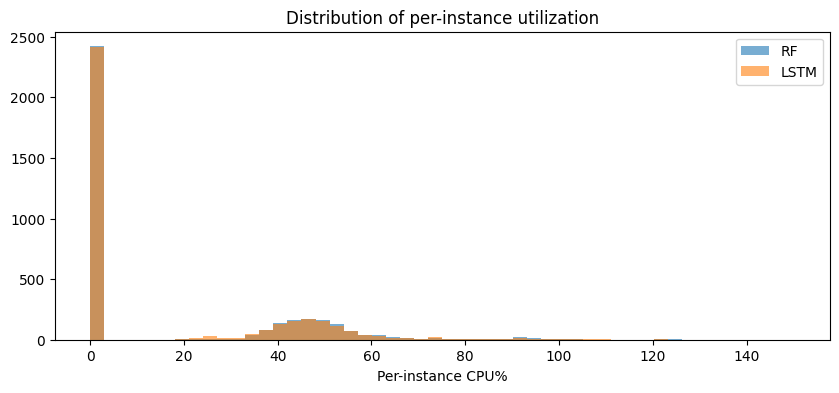

In [24]:
# ==============================================================
# SECTION 6 — QUICK METRICS & PLOTS
# ==============================================================

def summarise_sim(hist, total_cost, slo_violations, scale_actions, name="policy"):
    print(f"--- {name} summary ---")
    print(f"Total cost: ${total_cost:.2f}")
    print(f"SLO violations (minutes): {slo_violations}")
    print(f"Scaling actions: {scale_actions}")
    print(f"Avg instances: {hist['instances'].mean():.2f}")
    print()

summarise_sim(hist_rf, total_cost_rf, vio_rf, acts_rf, "RF policy")
summarise_sim(hist_lstm, total_cost_lstm, vio_lstm, acts_lstm, "LSTM policy")

# Compare per-instance utilization distributions
plt.figure(figsize=(10,4))
plt.hist(hist_rf['per_instance_util'], bins=50, alpha=0.6, label='RF')
plt.hist(hist_lstm['per_instance_util'], bins=50, alpha=0.6, label='LSTM')
plt.xlabel("Per-instance CPU%")
plt.legend()
plt.title("Distribution of per-instance utilization")
plt.show()


In [26]:
import os
import joblib
import torch

# ensure models directory exists
os.makedirs(r"D:/cloud proj/models", exist_ok=True)

# Save the trained RandomForest model
joblib.dump(rf, r"D:/cloud proj/models/rf_model1.pkl")
print("✅ Random Forest model saved as models/rf_model1.pkl")

# Save any scalers used for preprocessing (if present) — saved per feature name
try:
    for name, scaler in scalers.items():
        joblib.dump(scaler, rf"D:/cloud proj/models/scaler_{name}.pkl")
    print("✅ Scalers saved as models/scaler_<name>.pkl")
except NameError:
    print("ℹ️ No 'scalers' dict found in this notebook scope; skipped saving scalers")

# Save PyTorch LSTM model: prefer state_dict; fall back to saving full model if needed
try:
    torch.save(model.state_dict(), r"D:/cloud proj/models/lstm_model_state_dict.pt")
    print("✅ LSTM state_dict saved as models/lstm_model_state_dict.pt")
except Exception as e:
    print("⚠️ Failed to save state_dict, attempting full-model save. Error:", e)
    try:
        torch.save(model, r"D:/cloud proj/models/lstm_model_full.pt")
        print("✅ LSTM full model saved as models/lstm_model_full.pt")
    except Exception as e2:
        print("❌ Failed to save LSTM model:", e2)


✅ Random Forest model saved as models/rf_model1.pkl
✅ Scalers saved as models/scaler_<name>.pkl
✅ LSTM state_dict saved as models/lstm_model_state_dict.pt


In [27]:
# After you have your `agg` dataframe ready
save_path = r"D:\cloud proj\data\aggregated_cpu.csv"
agg.to_csv(save_path, index=False)
print(f"✅ Saved aggregated data to: {save_path}")


✅ Saved aggregated data to: D:\cloud proj\data\aggregated_cpu.csv
